## Long call payoff
- Let's define a function, __payoff_long_call__ with arguments sT and x for stock price at T and exercise price respectively. 
- The function will return the payoff of a long call once we call it with the value of sT and x.

In [13]:
def payoff_long_call(sT,x):
    return max(sT-x,0)

> Let's call the function with sT=25, and x=20:

In [152]:
payoff_long_call(25,20)

5

In [87]:
payoff_long_call(15,20)

0

## Short call payoff
- Let's now define a function similar way for the short call __payoff_short_call__ :

In [161]:
def payoff_short_call(sT,x):
    return -max(sT-x,0)

In [162]:
payoff_short_call(25,20)

-5

In [163]:
payoff_short_call(15,20)

0

> What if we want to calculate the the payoff of a range of sT? In that case we have load a package __numpy__. Then we call the sT value starting from 10 to 40 with an increment of 5:

In [21]:
import numpy as np
sT=np.arange(10,40,5)
sT

array([10, 15, 20, 25, 30, 35])

> Now we define the function __payoff_long_call__ in a different way: __(sT-x+abs(sT-x))/2__ ensures that payoff is never negative. If sT-x=-5, the abs(sT-x) would be +5. Adding -5 with +5 results in 0. And also, 0/2 = 0. 

In [24]:
def payoff_long_call(sT,x):
    return (sT-x+abs(sT-x))/2
x=20
payoff_long_call(sT,x)

array([ 0.,  0.,  0.,  5., 10., 15.])

> Let's now calculate and plot the payoffs:  

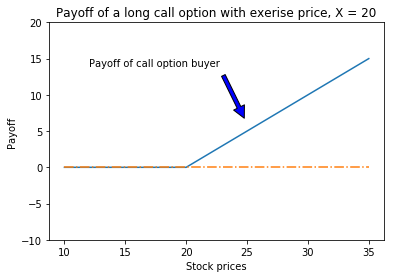

In [26]:
import numpy as np
import matplotlib.pyplot as plt
x=20
s=np.arange(10,40,5)
y=(s-x+abs(s-x))/2
y1=np.zeros(len(s))
plt.ylim(-10,20)
plt.plot(s,y)
plt.plot(s,y1,'-.')
plt.title("Payoff of a long call option with exerise price, X = 20")
plt.xlabel("Stock prices")
plt.ylabel("Payoff")
plt.annotate('Payoff of call option buyer', xy=(25,6), xytext=(12,14), 
             arrowprops=dict(facecolor='blue', shrink=0.1),)
plt.show()

## Long and short call profit/loss
> For profit/loss of a long call position, we have to substract call premium or price from the long payoff. For short call position we have to add call premium to the short payoff. 
* Let's the price of call is 3.84 
* Call price is paid at time zero, but the payoff is calculated at time T.
* We can substract call premium from the payoff only if we know the future value of call premium (3.84) at time T.
* Let's assume the call expires in one year, (T=1), and continuously compounded interest rate is 4% per annum.Then the future value of 3.84 would be 3.84 x exp(0.04x1) = 4.
* In order to clculate the future value, we need to import another package, __math__.
* Once we calculate the profits for a range of prices, we can plot them.

In [37]:
from IPython.display import Math
Math(r'profit_{l.c} = max(S_T-X,0) - ce^{rT}') # Profit equation for long call

<IPython.core.display.Math object>

In [38]:
from IPython.display import Math
Math(r'profit_{l.s} = -max(S_T-X,0) + ce^{rT}') #profit equation for short call

<IPython.core.display.Math object>

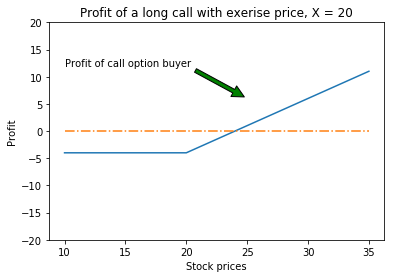

In [32]:
import math
import numpy as np
import matplotlib.pyplot as plt
x=20
cp=3.84                 # call premium
c=cp*math.exp(0.04)     # future value of cp in one year at 4% rate of interest with continuous compounding.
s=np.arange(10,40,5)
y=(s-x+abs(s-x))/2 -c
y2=np.zeros(len(s))
plt.ylim(-20,20)
plt.plot(s,y)
plt.plot(s,y2,'-.')
plt.title("Profit of a long call with exerise price, X = 20")
plt.xlabel("Stock prices")
plt.ylabel("Profit")
plt.annotate('Profit of call option buyer', xy=(25,6), xytext=(10,12), 
             arrowprops=dict(facecolor='green', shrink=0.05),)
plt.show()

## Long and short call profits together
> Lets now plot call option buyer and seller profit together:

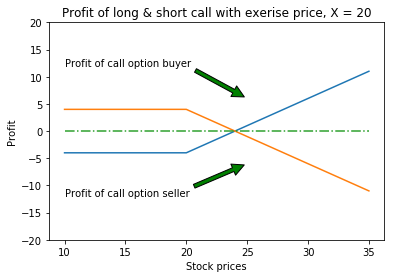

In [33]:
import math
import numpy as np
import matplotlib.pyplot as plt
x=20
cp=3.84                 # call premium
c=cp*math.exp(0.04)     # future value of cp in one year at 4% rate of interest with continuous compounding.
s=np.arange(10,40,5)
y=(s-x+abs(s-x))/2 -c
y2=np.zeros(len(s))
plt.ylim(-20,20)
plt.plot(s,y)
plt.plot(s,-y)
plt.plot(s,y2,'-.')
plt.title("Profit of long & short call with exerise price, X = 20")
plt.xlabel("Stock prices")
plt.ylabel("Profit")
plt.annotate('Profit of call option buyer', xy=(25,6), xytext=(10,12), 
             arrowprops=dict(facecolor='green', shrink=0.05),)
plt.annotate('Profit of call option seller', xy=(25,-6), xytext=(10,-12), 
             arrowprops=dict(facecolor='green', shrink=0.05),)
plt.show()